## 1 Einstellungen

### 1.1 Module importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Fenster Einstellungen

In [2]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2 Einlesen

### 2.1 XLSX, CSV, TXT, JSON Files 

#### Stichwort: pd.read_csv(), pd.read_excel(), pd.read_json(), pd.read_table()

In [3]:
# xlsx Datei einlesen
diabetes_df = pd.read_excel("diabetes.xlsx", sheet_name=1, usecols = ["n_pregnant", "gtt", "blood_pressure",
                                                                     "triceps_skin_fold_thickness", 
                                                                     "insulin", "bmi", "dpf", "age", "class"])
diabetes_df.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# csv Datei einlesen
tips_df = pd.read_csv("tips.csv", usecols = ["total_bill", "tip", "smoker", "day", "time", "size"])
tips_df.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
# txt Datei einlesen
cars_df = pd.read_table("cars.txt")
cars_df.head()

,# SPALTENNAMEN
0,symboling: Risiko-Level für Versicherungspolic...
1,normalized-losses: Durchschnittlicher Wertverl...
2,make: Automarke
3,fuel-type: Verwendetes Benzin
4,aspiration: Einspritzungsart


In [6]:
# json Datei einlesen
gapminder_df = pd.read_json("gapminder.json")
gapminder_df.head()

,Africa,Americas,Asia,Europe,Oceania
Algeria,"{'gdpPercap_1952': 2449.008185, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Angola,"{'gdpPercap_1952': 3520.610273, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Benin,"{'gdpPercap_1952': 1062.7522, 'gdpPercap_1957'...",NaN,NaN,NaN,NaN
Botswana,"{'gdpPercap_1952': 851.2411407, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Burkina Faso,"{'gdpPercap_1952': 543.2552413, 'gdpPercap_195...",NaN,NaN,NaN,NaN


### 2.2 Wichtige Einlese Optionen

In [7]:
# Stichwort: nrow, ncols, skiprows, skipfooters

diabetes2_df = pd.read_excel("diabetes.xlsx", sheet_name=1, usecols= ["class", "age", "bmi"], nrows=20)
diabetes2_df.head()

,bmi,age,class
0,26.6,31,0
1,23.3,32,1
2,28.1,21,0
3,43.1,33,1
4,25.6,30,0


### 2.3 Informationen zum DataFarme bekommen

#### Stichwort: df.dtypes, df.shape, df.info(), df.describe()

In [8]:
# Informationen zum DataFrame
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [9]:
# Ausgabe der Datentypen
tips_df.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
# Statistische Auswertungen
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# Anzeile Zeile und Spalte des DataFrames ausgeben
tips_df.shape 

(244, 6)

### 2.3 Json Files einlesen mit orient = "split"

#### Stichwort: pd.read_json("dateiname", orient = "split")

In [12]:
# Beim json Format split, muss ich diese explizit angeben. Alle anderen sollten funktionieren
json_split_df = pd.read_json("people_split.json", orient="split")
json_split_df

,Name,Age,Score
0,Alyse,30,4
1,John,14,9
2,Octavia,22,4
3,Gonzalo,27,10
4,Chasity,29,1


### 2.4 Multi Leven Json Files einlesen 

#### Stichwort: pd.json_normalize(df)

In [13]:
# Advanced Variante von multiple level Json File einlesen
import json

In [14]:
with open("multiple_levels.json") as f:
    # umwandeln in json format
    data = json.loads(f.read())
data

[{'Scaler': 'Standard',
  'family_min_samples_percentage': 5,
  'original_number_of_clusters': 4,
  'Results': [{'eps_value': 0.1,
    'min_samples': 5,
    'number_of_clusters': 9,
    'number_of_noise_samples': 72,
    'scores': {'adjusted_rand_index': 0.0012946494377947854,
     'adjusted_mutual_info_score': 0.008962599716725805,
     'homogeneity_score': 0.3307127972087838,
     'completeness_score': 0.9999999999999999,
     'v_measure_score': 0.4970460912414239,
     'fowlkes_mallows_score': 0.028277808486895997,
     'silhouette_coefficient': 0.6528095225386412,
     'calinski_harabasz_score': 10.808222558523699,
     'davies_bouldin_score': 1.7044935031867752}},
   {'eps_value': 0.1,
    'min_samples': 10,
    'number_of_clusters': 6,
    'number_of_noise_samples': 89,
    'scores': {'adjusted_rand_index': 0.0010853141067694784,
     'adjusted_mutual_info_score': 0.008123099381390967,
     'homogeneity_score': 0.29488451142983285,
     'completeness_score': 0.9999999999999996,
 

In [15]:
# 2 Level json File
df_multiple_level = pd.json_normalize(data = data, 
                                      record_path = ["Results"], 
                                      meta = ["original_number_of_clusters", "family_min_samples_percentage","Scaler"], 
                                      record_prefix="_")
df_multiple_level.head()

# data = json daten format
# record_path = Die Spalte, die man entpacken moechte
# meta = Die urspruengliche die man beibehalten will
# record_prefix = Start von Spaltenname

,_eps_value,_min_samples,_number_of_clusters,_number_of_noise_samples,_scores.adjusted_rand_index,_scores.adjusted_mutual_info_score,_scores.homogeneity_score,_scores.completeness_score,_scores.v_measure_score,_scores.fowlkes_mallows_score,_scores.silhouette_coefficient,_scores.calinski_harabasz_score,_scores.davies_bouldin_score,original_number_of_clusters,family_min_samples_percentage,Scaler
0,0.1,5,9,72,0.001295,0.008963,0.330713,1.0,0.497046,0.028278,0.652810,10.808223,1.704494,4,5,Standard
1,0.1,10,6,89,0.001085,0.008123,0.294885,1.0,0.455461,0.026360,0.558529,12.528465,1.760859,4,5,Standard
2,0.3,5,6,68,0.000810,0.007187,0.267258,1.0,0.421789,0.023607,0.636762,17.124353,1.630219,4,5,Standard
3,0.3,10,5,73,0.000781,0.006989,0.256727,1.0,0.408564,0.023294,0.613624,18.087761,1.688190,4,5,Standard
4,0.1,5,6,62,0.000830,0.007276,0.270214,1.0,0.425462,0.023811,0.695120,51.723076,1.255363,4,5,MinMax


### 2.5 DataWrangling mit Gapminder json Format

In [16]:
# Datensatz ausgeben
gapminder_df

,Africa,Americas,Asia,Europe,Oceania
Algeria,"{'gdpPercap_1952': 2449.008185, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Angola,"{'gdpPercap_1952': 3520.610273, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Benin,"{'gdpPercap_1952': 1062.7522, 'gdpPercap_1957'...",NaN,NaN,NaN,NaN
Botswana,"{'gdpPercap_1952': 851.2411407, 'gdpPercap_195...",NaN,NaN,NaN,NaN
Burkina Faso,"{'gdpPercap_1952': 543.2552413, 'gdpPercap_195...",NaN,NaN,NaN,NaN
...,...,...,...,...,...
Switzerland,NaN,NaN,NaN,"{'gdpPercap_1952': 14734.23275, 'gdpPercap_195...",NaN
Turkey,NaN,NaN,NaN,"{'gdpPercap_1952': 1969.10098, 'gdpPercap_1957...",NaN
United Kingdom,NaN,NaN,NaN,"{'gdpPercap_1952': 9979.508487, 'gdpPercap_195...",NaN
Australia,NaN,NaN,NaN,NaN,"{'gdpPercap_1952': 10039.59564, 'gdpPercap_195..."


In [17]:
# Dataframe von Wide to Long reshapen Folgende Idee: -> spalten neu: land, kontinent, json_wert
gapminder_df = pd.melt(frame = gapminder_df.reset_index(), id_vars = "index", var_name= "Kontinent")
gapminder_df

,index,Kontinent,value
0,Algeria,Africa,"{'gdpPercap_1952': 2449.008185, 'gdpPercap_195..."
1,Angola,Africa,"{'gdpPercap_1952': 3520.610273, 'gdpPercap_195..."
2,Benin,Africa,"{'gdpPercap_1952': 1062.7522, 'gdpPercap_1957'..."
3,Botswana,Africa,"{'gdpPercap_1952': 851.2411407, 'gdpPercap_195..."
4,Burkina Faso,Africa,"{'gdpPercap_1952': 543.2552413, 'gdpPercap_195..."
...,...,...,...
705,Switzerland,Oceania,NaN
706,Turkey,Oceania,NaN
707,United Kingdom,Oceania,NaN
708,Australia,Oceania,"{'gdpPercap_1952': 10039.59564, 'gdpPercap_195..."


In [18]:
# normalize (auspacken) der json werte
gapminderjson_df = pd.json_normalize(gapminder_df["value"])
gapminderjson_df

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,5023.216647,4797.295051,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142.0,33333216.0
1,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,2627.845685,2277.140884,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106.0,12420476.0
2,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,1191.207681,1232.975292,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113.0,8078314.0
3,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,7954.111645,8647.142313,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347.0,1639131.0
4,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,931.752773,946.294962,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209.0,14326203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,23424.766830,26997.936570,...,10794968.0,11872264.0,13177000.0,14074100.0,15184200.0,16257249.0,17481977.0,18565243.0,19546792.0,20434176.0


In [19]:
# Dataframes zusammenfuehren
gapminder_df_clean = pd.concat([gapminder_df, gapminderjson_df], axis = 1).drop("value", axis = 1)

In [20]:
gapminder_df_clean

,index,Kontinent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Algeria,Africa,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142.0,33333216.0
1,Angola,Africa,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106.0,12420476.0
2,Benin,Africa,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113.0,8078314.0
3,Botswana,Africa,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347.0,1639131.0
4,Burkina Faso,Africa,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209.0,14326203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,Switzerland,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,Turkey,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,United Kingdom,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708,Australia,Oceania,10039.595640,10949.649590,12217.226860,14526.124650,16788.629480,18334.197510,19477.009280,21888.889030,...,10794968.0,11872264.0,13177000.0,14074100.0,15184200.0,16257249.0,17481977.0,18565243.0,19546792.0,20434176.0


## 3 Selektieren

### 3.1 Zeilen und Spalten mit iloc selektieren

#### Stichwort: iloc, loc (Am besten nur iloc nutzen)
#### df.iloc[start_zeile:ende_zeile, start_spalte:ende_spalte]

In [21]:
# Header und Data von cars_df erstellen mittels iloc Trennung
cars_header = cars_df.iloc[ 0:26 , :]
cars_data = cars_df.iloc[27: , :]
display(cars_header, cars_data)

,# SPALTENNAMEN
0,symboling: Risiko-Level für Versicherungspolic...
1,normalized-losses: Durchschnittlicher Wertverl...
2,make: Automarke
3,fuel-type: Verwendetes Benzin
4,aspiration: Einspritzungsart
5,num-of-doors: Anzahl Türen
6,body-style: Karosseriebauform
7,drive-wheels: Antriebsform (Anzahl Räder mit A...
8,engine-location: Standort des Motors
9,wheel-base': Radstand (Abstand zwischen Vorder...


,# SPALTENNAMEN
27,"3,-,alfa-romero,gas,std,two,convertible,rwd,fr..."
28,"3,-,alfa-romero,gas,std,two,convertible,rwd,fr..."
29,"1,-,alfa-romero,gas,std,two,hatchback,rwd,fron..."
30,"2,164,audi,gas,std,four,sedan,fwd,front,99.80,..."
31,"2,164,audi,gas,std,four,sedan,4wd,front,99.40,..."
...,...
227,"-1,95,volvo,gas,std,four,sedan,rwd,front,109.1..."
228,"-1,95,volvo,gas,turbo,four,sedan,rwd,front,109..."
229,"-1,95,volvo,gas,std,four,sedan,rwd,front,109.1..."
230,"-1,95,volvo,diesel,turbo,four,sedan,rwd,front,..."


### 3.2 Filtern nach Bedingungen

#### Stichwort: df[df[spalte] |, &], df[~(df[spalte])]

In [22]:
# Selektieren unter zwei Bedingungen mit oder Verknuefpung
tips_df[(tips_df["total_bill"] >= 10) | (tips_df["day"] == "Sun")].head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [23]:
# Verninungen im Filter mittels Tilde ~
tips_df[~(tips_df["time"] == "Dinner")]  

,total_bill,tip,smoker,day,time,size
77,27.20,4.00,No,Thur,Lunch,4
78,22.76,3.00,No,Thur,Lunch,2
79,17.29,2.71,No,Thur,Lunch,2
80,19.44,3.00,Yes,Thur,Lunch,2
81,16.66,3.40,No,Thur,Lunch,2
...,...,...,...,...,...,...
222,8.58,1.92,Yes,Fri,Lunch,1
223,15.98,3.00,No,Fri,Lunch,3
224,13.42,1.58,Yes,Fri,Lunch,2
225,16.27,2.50,Yes,Fri,Lunch,2


### 3.3 Selektieren nach Datentyp

#### Stichwort: df.select_dtypes(include = ["float64"]), df.select_dtypes(include = ["object"]) 

In [24]:
# Datentypen ausgeben
diabetes_df.dtypes

n_pregnant                       int64
gtt                              int64
blood_pressure                   int64
triceps_skin_fold_thickness      int64
insulin                          int64
bmi                            float64
dpf                            float64
age                              int64
class                            int64
dtype: object

In [25]:
# Spalten aufgrund vom Datentyp selektieren/ausschliessen
diabetes_df.select_dtypes(include = ["float64"], exclude = ["int64"]).head()

,bmi,dpf
0,26.6,0.351
1,23.3,0.672
2,28.1,0.167
3,43.1,2.288
4,25.6,0.201


### 3.4 Mit Datetimens64 Datentyp filtern

In [26]:
# Daten mit moeglichen Datumsspalten einlesen
sterblichkeit_df = pd.read_excel("Sterblichkeit.xlsx", sheet_name=1)
sterblichkeit_df

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze
0,2020,1,05.01.2020,0-64,149,173,139,207
1,2020,2,12.01.2020,0-64,166,172,138,206
2,2020,3,19.01.2020,0-64,186,172,138,206
3,2020,4,26.01.2020,0-64,177,172,138,205
4,2020,5,02.02.2020,0-64,163,171,137,205
...,...,...,...,...,...,...,...,...
309,2022,48,04.12.2022,65+,.,1141,1054,1228
310,2022,49,11.12.2022,65+,.,1151,1065,1239
311,2022,50,18.12.2022,65+,.,1160,1073,1249
312,2022,51,25.12.2022,65+,.,1171,1083,1260


In [27]:
# Datentyp ausgeben vom DataFarme
sterblichkeit_df.dtypes

Jahr          int64
Woche         int64
endend       object
Alter        object
AnzTF_HR     object
Erwartung     int64
untGrenze     int64
obeGrenze     int64
dtype: object

In [28]:
# Konvertieren der Spalte endend in einem Panda Datatime Datentyp
# ACHTUNG: Achte immer darauf, dass Tag und Monat nicht vertauscht werden!!!
pd.to_datetime(sterblichkeit_df["endend"], dayfirst=True).dt.day.head()
# Kurzer check, ob richtig konvertiert werden, indem man die Tage ausgibt und nachcheckt.

0     5
1    12
2    19
3    26
4     2
Name: endend, dtype: int64

In [29]:
# Konvertierung durchfuheren
sterblichkeit_df["endend"] = pd.to_datetime(sterblichkeit_df["endend"], dayfirst = True)
sterblichkeit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Jahr       314 non-null    int64         
 1   Woche      314 non-null    int64         
 2   endend     314 non-null    datetime64[ns]
 3   Alter      314 non-null    object        
 4   AnzTF_HR   314 non-null    object        
 5   Erwartung  314 non-null    int64         
 6   untGrenze  314 non-null    int64         
 7   obeGrenze  314 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 19.8+ KB


In [30]:
# Filterung aufgrund vom Datetime Datentyp
sterblichkeit_df.select_dtypes(include=["object", "datetime64[ns]"]).head()

,endend,Alter,AnzTF_HR
0,2020-01-05,0-64,149
1,2020-01-12,0-64,166
2,2020-01-19,0-64,186
3,2020-01-26,0-64,177
4,2020-02-02,0-64,163


In [31]:
# Filterung aufgrund vom Datentyp zwischen zwei Daten.
sterblichkeit_df[(sterblichkeit_df["endend"] >= "2020-01-01") & (sterblichkeit_df["endend"] < "2020-12-31")]

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze
0,2020,1,2020-01-05,0-64,149,173,139,207
1,2020,2,2020-01-12,0-64,166,172,138,206
2,2020,3,2020-01-19,0-64,186,172,138,206
3,2020,4,2020-01-26,0-64,177,172,138,205
4,2020,5,2020-02-02,0-64,163,171,137,205
...,...,...,...,...,...,...,...,...
204,2020,48,2020-11-29,65+,1934,1172,1084,1261
205,2020,49,2020-12-06,65+,1962,1184,1096,1273
206,2020,50,2020-12-13,65+,1974,1194,1105,1283
207,2020,51,2020-12-20,65+,1989,1203,1114,1292


### 3.5 Spalte/Zeilen entfernen

#### Stichwort: df.drop(spaltename, axis = 1)

In [32]:
# Ausgabe vom DataFrame
json_split_df

,Name,Age,Score
0,Alyse,30,4
1,John,14,9
2,Octavia,22,4
3,Gonzalo,27,10
4,Chasity,29,1


In [33]:
# Entfernen der Spalte Score und ueberschreibung des DataFrames mittels inplace = True
json_split_df.drop("Score", axis =  1, inplace = True)
# Ausgabe des DataFrames
json_split_df

,Name,Age
0,Alyse,30
1,John,14
2,Octavia,22
3,Gonzalo,27
4,Chasity,29


### 3.6 Index entfernen

#### Stichwort: df.reset_index(drop = True)

In [34]:
# DataFrame neu anordnung mittels sample. (df.sample => wird fuer Stichprobe eigentlich verwendet) 
json_split_df = json_split_df.sample(frac = 1)
json_split_df

,Name,Age
2,Octavia,22
1,John,14
4,Chasity,29
3,Gonzalo,27
0,Alyse,30


In [35]:
# Index resetten ohne index Spalte zu entfernen
json_split_df.reset_index()

,index,Name,Age
0,2,Octavia,22
1,1,John,14
2,4,Chasity,29
3,3,Gonzalo,27
4,0,Alyse,30


In [36]:
# Index resetten mit Index Spalte droppen
json_split_df.reset_index(drop = True)

,Name,Age
0,Octavia,22
1,John,14
2,Chasity,29
3,Gonzalo,27
4,Alyse,30


### 3.7 Aus einer Spalte mehrere Spalten generieren aufgrund Trennzeichen

#### Stichwort: df[spalte].str.split(", ", expand = True)

In [37]:
# cars_data_df erstellen
cars_data_df = cars_data["# SPALTENNAMEN"].str.split(",", expand = True)
cars_data_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
27,3,-,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
28,3,-,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
29,1,-,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845
228,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045
229,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485
230,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470


In [38]:
# Analog zu cars_data_df, mit cars_header
cars_df_header = cars_header.iloc[:,0].str.split(":", expand = True)
cars_df_header

,0,1
0,symboling,Risiko-Level für Versicherungspolice (-3 sehr...
1,normalized-losses,Durchschnittlicher Wertverlust pro Jahr in Do...
2,make,Automarke
3,fuel-type,Verwendetes Benzin
4,aspiration,Einspritzungsart
5,num-of-doors,Anzahl Türen
6,body-style,Karosseriebauform
7,drive-wheels,Antriebsform (Anzahl Räder mit Antrieb)
8,engine-location,Standort des Motors
9,wheel-base',Radstand (Abstand zwischen Vorder- und Hinter...


### 3.8 Spaltenname aendern

#### Stichwort: df.columns = [...]

In [39]:
# Eine List erstellen mit den neuen Spaltennamen
cars_head_list = list(cars_df_header.iloc[: , 0])
cars_head_list

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 "wheel-base'",
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [40]:
# Ueberschreiben der alten Spalten
cars_data_df.columns = cars_head_list
cars_data_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base',...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,3,-,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
28,3,-,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
29,1,-,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


In [41]:
# Ausgabe von allen Spaltennamen:
cars_data_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base'', 'length', 'width', 'height', 'curb-weight',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## 4 Datentypen

#### Stichwort: df['col'] = df['col'].astype(....) int64, float64, "category", bool                                                                                                        

### 4.1 Datentyp einer Spalte aendern

In [42]:
# Ausgabe vom Datentyp jeder Spalte
cars_data_df.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base'          object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

In [43]:
# Spalte Horsepower "-" ersetzen mit np.Nan
cars_data_df["horsepower"].replace("-", np.nan, inplace = True) 

In [44]:
# Umwandeln int/float Datentyp
int_cols = ["highway-mpg", "city-mpg", "horsepower"]
cars_data_df[int_cols] = cars_data_df[int_cols].astype(float)
cars_data_df.dtypes.tail()

horsepower     float64
peak-rpm        object
city-mpg       float64
highway-mpg    float64
price           object
dtype: object

### 4.2 Kategorischer Datentyp mit Reihenfolge

#### Stichwort: df['col'] = df['col'].cat.set_categories(['cat1', 'cat2'.....] , ordered = True)

In [45]:
# umwandeln in einer Kategorische Variabel
cars_data_df["num-of-cylinders"] = cars_data_df["num-of-cylinders"].astype("category")
cars_data_df["num-of-cylinders"].dtypes

CategoricalDtype(categories=['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'], ordered=False)

In [46]:
# Reihenfolge der Werte definieren
cars_data_df["num-of-cylinders"] = cars_data_df["num-of-cylinders"].cat.set_categories(["two", "three", 
                                                                                        "four", "five", 
                                                                                        "six", "eight", 
                                                                                        "twelve"], ordered = True)

In [47]:
# Ueberpruefen, ob ordered=True
cars_data_df["num-of-cylinders"].dtypes

CategoricalDtype(categories=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], ordered=True)

<AxesSubplot:>

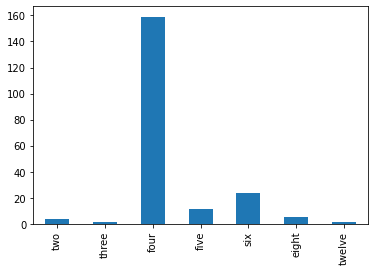

In [48]:
# Moegliche Visuelle Darstellung
cars_data_df["num-of-cylinders"].value_counts(sort=False).plot(kind = "bar")

### 4.3 Aus Quantitativen Spalte eine Qualitative Spalte erstellen

#### Stichwort: pd.cut(), pd.qcut()

In [49]:
# Aus einer Kategorischen Spalte eine Quantiative Spalte erstellen
cars_data_df["speed"] = pd.cut(cars_data_df["horsepower"], 
                               bins = 3, 
                               right = True, 
                               labels = ["Slow", "Medium", "Fast"])

cars_data_df[["horsepower", "speed"]]

,horsepower,speed
27,111.0,Slow
28,111.0,Slow
29,154.0,Medium
30,102.0,Slow
31,115.0,Slow
...,...,...
227,114.0,Slow
228,160.0,Medium
229,134.0,Medium
230,106.0,Slow


In [50]:
# Unterschied zwischen right = True und right = False (mit right = True)
pd.cut(cars_data_df["horsepower"], bins = 5, right = True)

27      (96.0, 144.0]
28      (96.0, 144.0]
29     (144.0, 192.0]
30      (96.0, 144.0]
31      (96.0, 144.0]
            ...      
227     (96.0, 144.0]
228    (144.0, 192.0]
229     (96.0, 144.0]
230     (96.0, 144.0]
231     (96.0, 144.0]
Name: horsepower, Length: 205, dtype: category
Categories (5, interval[float64, right]): [(47.76, 96.0] < (96.0, 144.0] < (144.0, 192.0] < (192.0, 240.0] < (240.0, 288.0]]

In [51]:
# mit right = False 
pd.cut(cars_data_df["horsepower"], bins = 5, right = False)

27      [96.0, 144.0)
28      [96.0, 144.0)
29     [144.0, 192.0)
30      [96.0, 144.0)
31      [96.0, 144.0)
            ...      
227     [96.0, 144.0)
228    [144.0, 192.0)
229     [96.0, 144.0)
230     [96.0, 144.0)
231     [96.0, 144.0)
Name: horsepower, Length: 205, dtype: category
Categories (5, interval[float64, left]): [[48.0, 96.0) < [96.0, 144.0) < [144.0, 192.0) < [192.0, 240.0) < [240.0, 288.24)]

In [52]:
# in Price Spalte "-" ersetzen mit np.nan und umwandeln in ein int Datentyp
cars_data_df["price"] = cars_data_df["price"].replace("-", np.nan).astype(float)
cars_data_df["price"].dtypes

dtype('float64')

In [53]:
# alternative mit qcut
pd.qcut(cars_data_df["price"], q = 3)

27     (8321.667, 13850.0]
28      (13850.0, 45400.0]
29      (13850.0, 45400.0]
30      (13850.0, 45400.0]
31      (13850.0, 45400.0]
              ...         
227     (13850.0, 45400.0]
228     (13850.0, 45400.0]
229     (13850.0, 45400.0]
230     (13850.0, 45400.0]
231     (13850.0, 45400.0]
Name: price, Length: 205, dtype: category
Categories (3, interval[float64, right]): [(5117.999, 8321.667] < (8321.667, 13850.0] < (13850.0, 45400.0]]

In [54]:
pd.qcut(cars_data_df["price"], q = 3, labels = ["billig", "gahtso", "eifachtuer"])

27         gahtso
28     eifachtuer
29     eifachtuer
30     eifachtuer
31     eifachtuer
          ...    
227    eifachtuer
228    eifachtuer
229    eifachtuer
230    eifachtuer
231    eifachtuer
Name: price, Length: 205, dtype: category
Categories (3, object): ['billig' < 'gahtso' < 'eifachtuer']

### 4.4 Umgang mit dem Datetime Datentyp

#### Stichwort: df[datumspalte].dt.month, 

In [55]:
# Asugabe des Jahres, Monates, Tages, Wochen etc.. 

In [56]:
# Ausgabe der Datentypen von sterblichkeit_df
sterblichkeit_df.dtypes

Jahr                  int64
Woche                 int64
endend       datetime64[ns]
Alter                object
AnzTF_HR             object
Erwartung             int64
untGrenze             int64
obeGrenze             int64
dtype: object

In [57]:
# Jahr herausfiltern aus datetime Datentyp
sterblichkeit_df["Jahr2"] = sterblichkeit_df["endend"].dt.year
sterblichkeit_df.head()

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze,Jahr2
0,2020,1,2020-01-05,0-64,149,173,139,207,2020
1,2020,2,2020-01-12,0-64,166,172,138,206,2020
2,2020,3,2020-01-19,0-64,186,172,138,206,2020
3,2020,4,2020-01-26,0-64,177,172,138,205,2020
4,2020,5,2020-02-02,0-64,163,171,137,205,2020


In [58]:
# Monat herausfiltern aus datetime Datentyp
sterblichkeit_df["Monat"] = sterblichkeit_df["endend"].dt.month
sterblichkeit_df.head()

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze,Jahr2,Monat
0,2020,1,2020-01-05,0-64,149,173,139,207,2020,1
1,2020,2,2020-01-12,0-64,166,172,138,206,2020,1
2,2020,3,2020-01-19,0-64,186,172,138,206,2020,1
3,2020,4,2020-01-26,0-64,177,172,138,205,2020,1
4,2020,5,2020-02-02,0-64,163,171,137,205,2020,2


In [59]:
# Tag herausfiltern aus datetime Datentyp
sterblichkeit_df["Tag"] = sterblichkeit_df["endend"].dt.day
sterblichkeit_df.head()

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze,Jahr2,Monat,Tag
0,2020,1,2020-01-05,0-64,149,173,139,207,2020,1,5
1,2020,2,2020-01-12,0-64,166,172,138,206,2020,1,12
2,2020,3,2020-01-19,0-64,186,172,138,206,2020,1,19
3,2020,4,2020-01-26,0-64,177,172,138,205,2020,1,26
4,2020,5,2020-02-02,0-64,163,171,137,205,2020,2,2


Weiter Dokumentation : https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html

## 5 Identifikation von Fehlende/Komische Werte

Indiz fuer komische Werte ist, wenn Quantitative Daten als String bzw. als Objekt eingelesen werden! 
Bei Quantitativen Werte kann man die Verteilung plotten, und sofern es keine smothe Verteilung ist, muss man ueberpruefen, 
ob die Werte plausible sind. 

### 5.1 Elemente einer Spalte ausgeben

#### Stichwort: df.unique()

In [60]:
# Mittels For Schleife, jeden Spaltenwert betrachten. 
for col in cars_data_df.columns:
    print(col)
    print(cars_data_df[col].unique())

symboling
['3' '1' '2' '0' '-1' '-2']
normalized-losses
['-' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four' '-']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
wheel-base'
['88.60' '94.50' '99.80' '99.40' '105.80' '99.50' '101.20' '103.50'
 '110.00' '88.40' '93.70' '103.30' '95.90' '86.60' '96.50' '94.30' '96.00'
 '113.00' '102.00' '93.10' '95.30' '98.80' '104

Bsp von Oben: peak-rpm hat "-" Werte, aus diesem Grund kann pandas die Spalte nicht in ein Int/Float Datentyp umwandeln beim einlesen

### 5.2 Verteilung plotten, moegliche Ausreisser definieren

#### Stichwort: histgram(), kind = "kde

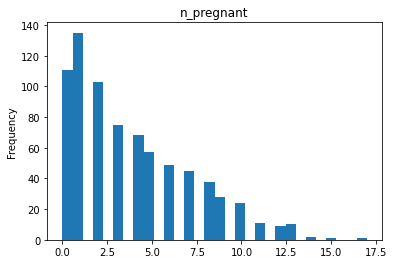

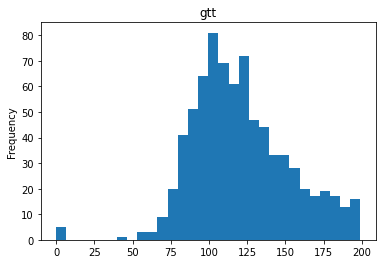

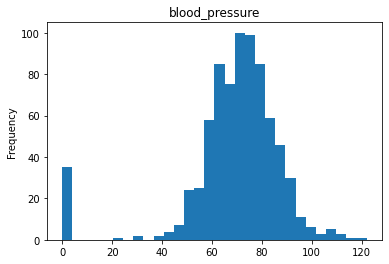

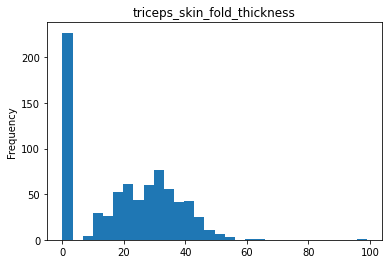

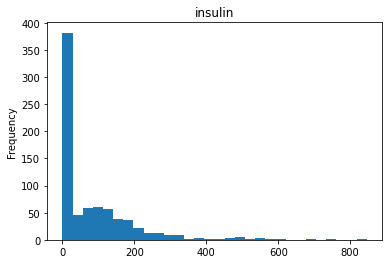

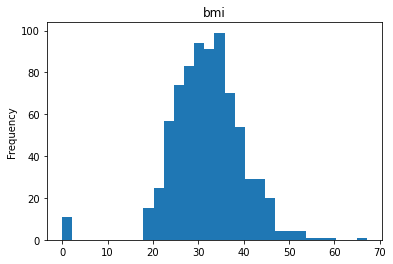

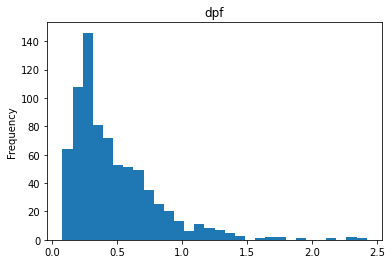

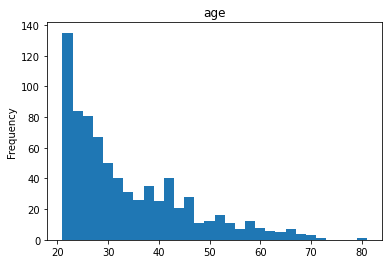

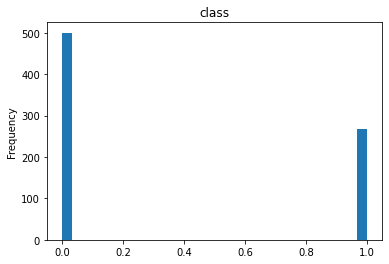

In [61]:
# Verteilungen der Daten mittels Hitogramme plotten, um Verteilung zu sehen
for col in diabetes_df.columns:
    diabetes_df[col].plot(kind = "hist", bins = 30)
    plt.title(col)
    plt.show()

Plausibilitaets ueberpruefung: Kann der Blutdruck 0 sein? -> Nein, -> Wert die 0 sind ersetzen mit np.nan
analog zu insulin und tricpes_skin_fold_thickness, bmi

### 5.3 Ersetzen von Werten mit NaN

#### Stichwort: df.spalte.replace("komische_wert", np.nan)

In [62]:
# ersetzen von komischen Wertenmitnp.nan
col_komisch = ["gtt", "blood_pressure", "triceps_skin_fold_thickness", "insulin", "bmi"]
diabetes_df[col_komisch] = diabetes_df[col_komisch].replace(0, np.nan)
diabetes_df.head(10)

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
5,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
6,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
7,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
8,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1
9,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0


In [63]:
# Alle komischen Werte in einer quantiativen Spalte mit Regex als np.nan ersetzen
col_komisch = ["normalized-losses", "bore", "stroke", "peak-rpm"]

for col in col_komisch:
    cars_data_df[col] = cars_data_df[col].replace(to_replace=r'[^\d.]', value=np.nan, regex=True)

cars_data_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base',...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,speed
27,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,13495.0,Slow
28,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,16500.0,Slow
29,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,mpfi,2.68,3.47,9.00,154.0,5000,19.0,26.0,16500.0,Medium
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,mpfi,3.19,3.40,10.00,102.0,5500,24.0,30.0,13950.0,Slow
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,mpfi,3.19,3.40,8.00,115.0,5500,18.0,22.0,17450.0,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,9.50,114.0,5400,23.0,28.0,16845.0,Slow
228,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,8.70,160.0,5300,19.0,25.0,19045.0,Medium
229,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.58,2.87,8.80,134.0,5500,18.0,23.0,21485.0,Medium
230,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,idi,3.01,3.40,23.00,106.0,4800,26.0,27.0,22470.0,Slow


### 5.4 Anteil fehlende Werte absolut und relativ ermitteln

#### Stichwort: df.isna().sum(), df.isna().mean() * 100

In [64]:
# Absoluter Anteil fehlender Werte berechnen
diabetes_df.isna().sum()

n_pregnant                       0
gtt                              5
blood_pressure                  35
triceps_skin_fold_thickness    227
insulin                        373
bmi                             11
dpf                              0
age                              0
class                            0
dtype: int64

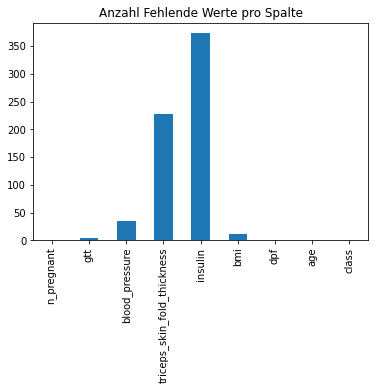

In [65]:
# Absoluter Anteil fehlender Werte visualisieren mittels barplot
diabetes_df.isna().sum().plot(kind = "bar")
plt.title("Anzahl Fehlende Werte pro Spalte")
plt.show()

In [66]:
# Relativer Anteil fehlender Werte berechnen variante1
diabetes_df.isna().sum() / len(diabetes_df) * 100

n_pregnant                      0.000000
gtt                             0.651890
blood_pressure                  4.563233
triceps_skin_fold_thickness    29.595828
insulin                        48.631030
bmi                             1.434159
dpf                             0.000000
age                             0.000000
class                           0.000000
dtype: float64

In [67]:
# Relativer Anteil fehlender Werte berechnen variante2
diabetes_df.isna().mean() * 100

n_pregnant                      0.000000
gtt                             0.651890
blood_pressure                  4.563233
triceps_skin_fold_thickness    29.595828
insulin                        48.631030
bmi                             1.434159
dpf                             0.000000
age                             0.000000
class                           0.000000
dtype: float64

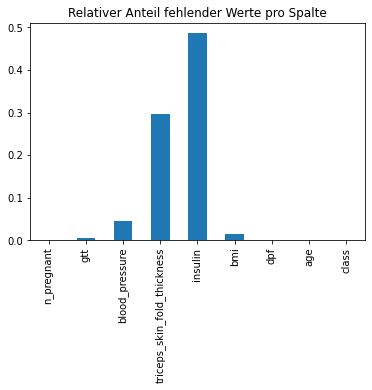

In [68]:
# Realtiver Anteil fehlender Werte visualisieren
diabetes_df.isna().mean().plot(kind = "bar")
plt.title("Relativer Anteil fehlender Werte pro Spalte")
plt.show()

### 5.5 Hat die Zeile Fehlende Werte?

In [69]:
# Spalte hinzufuegen, die ein Indiz dafuer gibt, ob die Zeile komplett ist
diabetes_df["not_complete_flag"] = diabetes_df.isna().any(axis = 1)
diabetes_df

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,True
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,True
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,True
...,...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,False
763,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,True
764,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,False
765,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,True


### 5.6 Fehlende Werte Korrelationsmatrix (Zusammenhang mit anderen Spalten?)

<AxesSubplot:>

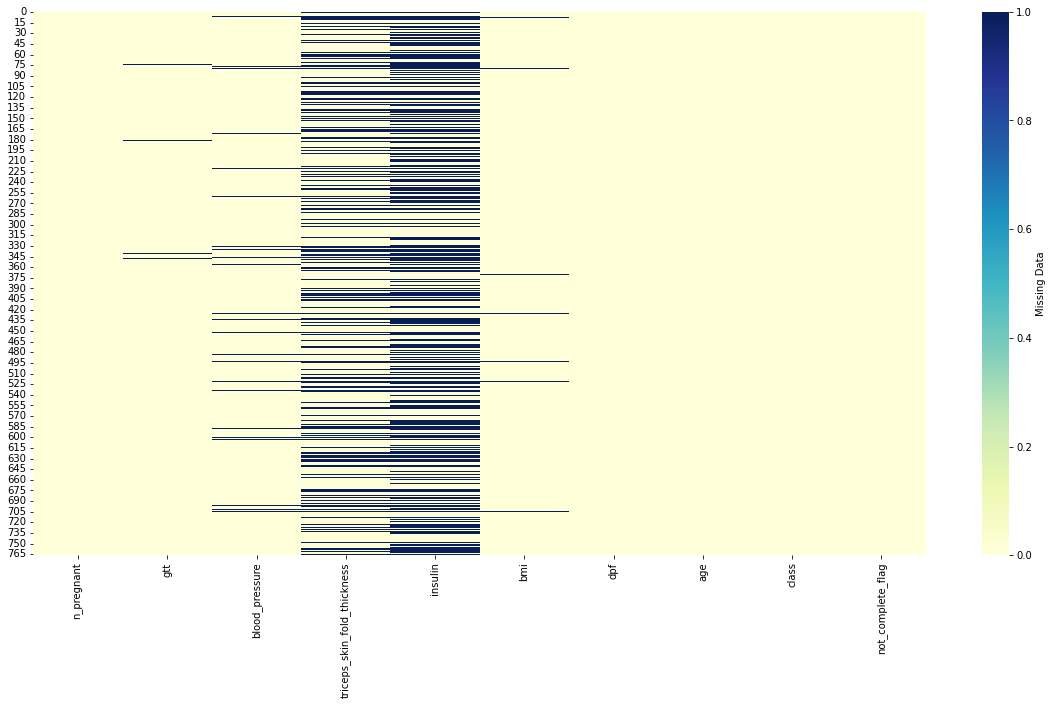

In [70]:
# Mittels Heatmap Darstellen (Easy Variante)
plt.figure(figsize=(20,10))
sns.heatmap(diabetes_df.isna(), cmap = "YlGnBu", cbar_kws={'label': 'Missing Data'})

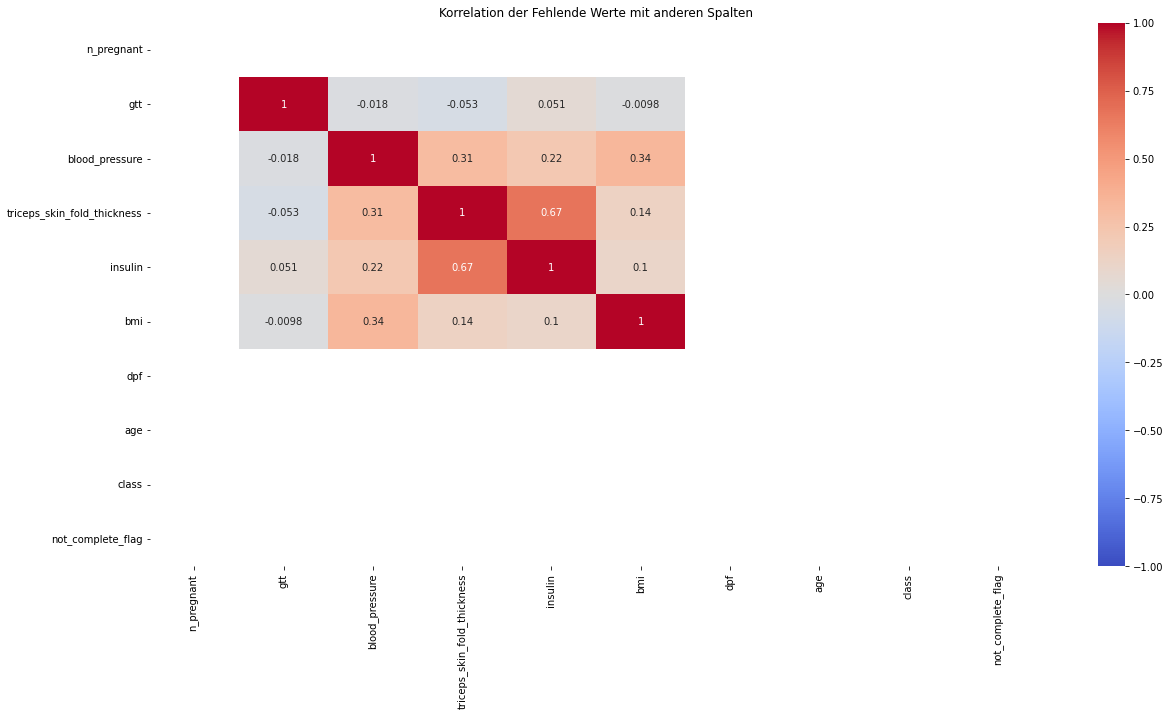

In [71]:
# Korrelationsmatrix erstellen mit fehlenden Werten
plt.figure(figsize=(20,10))
sns.heatmap(diabetes_df.isna().corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title("Korrelation der Fehlende Werte mit anderen Spalten")
plt.show()

### 5.7 Doppelte Werte beseitigen

#### Stichwort: df.drop_duplicates(["col1", "col2"])

In [72]:
# Einlesen eines DataFarmes
council_df = pd.read_excel("Ratsmitglieder_1848_DE.xlsx", usecols = ["FirstName", "LastName", "CouncilName"])
council_df.head(10)

,FirstName,LastName,CouncilName
0,Giuseppe,a Marca,Ständerat
1,Alois,Ab Yberg,Nationalrat
2,Fabio,Abate,Nationalrat
3,Fabio,Abate,Nationalrat
4,Fabio,Abate,Ständerat
5,Fabio,Abate,Ständerat
6,Fabio,Abate,Nationalrat
7,Johann Jakob,Abegg,Nationalrat
8,Alfred,Abegg,Nationalrat
9,Heinrich E.,Abt,Nationalrat


In [73]:
# Einfaches Beispiel: Doppelte Personen im DataFrame entfernen 
# Die Zeilen muessen identisch sein damit diese entfernt werden)
council_df.drop_duplicates().head()

,FirstName,LastName,CouncilName
0,Giuseppe,a Marca,Ständerat
1,Alois,Ab Yberg,Nationalrat
2,Fabio,Abate,Nationalrat
4,Fabio,Abate,Ständerat
7,Johann Jakob,Abegg,Nationalrat


### 5.8 Zeile entfernen die NaN beinhalten

#### Stichwort: df.dropna()

In [74]:
# Falls man ganze Zeilen entfernen moechte die einen Na Wert beinhalten
diabetes_df.dropna(axis = 0)

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False
5,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,False
7,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,False
12,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,False
...,...,...,...,...,...,...,...,...,...,...
752,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1,False
754,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1,False
759,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0,False
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,False


df.dropna() nicht zu empfehlen, da viele Informationen verloren gehen koennen! 

# 6 Imputationsstrategie

#### Stichwort: fillna(), mean, median, KNNImputer, interpolate()

### 6.1 Imputation mit Mean oder Median

In [75]:
# Berechnen des Mittelwertes einer Spalte und anschliessend Na Wert ersetzen. 
diabetes_df_mean = diabetes_df.copy()
for col in diabetes_df_mean.columns:
    diabetes_df_mean[col].fillna(diabetes_df_mean[col].mean(), inplace = True)
diabetes_df_mean.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0,True
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1,True
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,False
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,False
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0,True


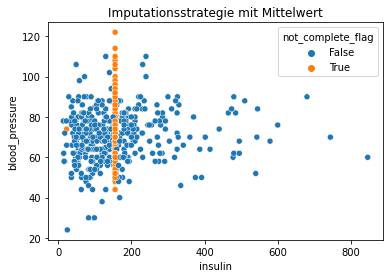

In [76]:
# Visualisierung der Imputationsstrategie mit Mittelwert
sns.scatterplot(data=diabetes_df_mean, x = "insulin", y = "blood_pressure", hue = "not_complete_flag")
plt.title("Imputationsstrategie mit Mittelwert")
plt.show()

In [77]:
# Berechnen des Medians einer Spalte und anschliessend Na Wert ersetzen. 
diabetes_df_median = diabetes_df.copy()
for col in diabetes_df_median.columns:
    diabetes_df_median[col].fillna(diabetes_df_median[col].mean(), inplace = True)
diabetes_df_median.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0,True
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1,True
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,False
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,False
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0,True


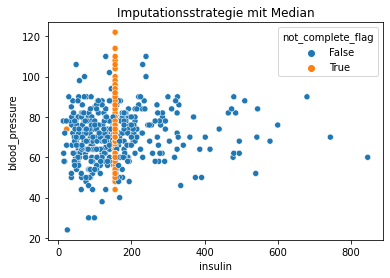

In [78]:
# Visualisierung der Imputationsstrategie mit Median
sns.scatterplot(data=diabetes_df_median, x = "insulin", y = "blood_pressure", hue = "not_complete_flag")
plt.title("Imputationsstrategie mit Median")
plt.show()

### 6.2 Imputation mit Interpolation

In [79]:
# Das Bearbeitende DataFrame
diabetes_df

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,True
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,True
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0,True
...,...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,False
763,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,True
764,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,False
765,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,True


In [80]:
# NaN Werte interpolieren mittels Linearer Methode
diabetes_df_interpolate = diabetes_df.copy()
for col in diabetes_df_interpolate.columns:
    diabetes_df_interpolate[col].interpolate(method = "linear", inplace = True)
diabetes_df_interpolate

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,True
1,8,183.0,64.0,26.0,NaN,23.3,0.672,32,1,True
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False
4,5,116.0,74.0,33.5,128.0,25.6,0.201,30,0,True
...,...,...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,False
763,2,122.0,70.0,27.0,146.0,36.8,0.340,27,0,True
764,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,False
765,1,126.0,60.0,27.0,112.0,30.1,0.349,47,1,True


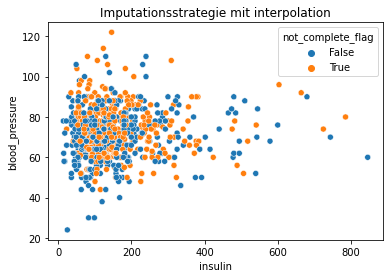

In [81]:
# Visualisierung der Imputationsstrategie mittels Interpolation
sns.scatterplot(data=diabetes_df_interpolate, x = "insulin", y = "blood_pressure", hue = "not_complete_flag")
plt.title("Imputationsstrategie mit interpolation")
plt.show()

### 6.3 Imputation mit KNNImputer Model

In [82]:
# Modul importieren
from sklearn.impute import KNNImputer

# DataFrame kopieren und Spaltenname als Variabel abspeichern
diabetes_df_knn = diabetes_df.copy()
headers = diabetes_df.columns

# Durchfuhrung der KNNImputationsstategie mit neighbours = 2
impute_knn = KNNImputer(n_neighbors=2)
diabetes_df_knn = impute_knn.fit_transform(diabetes_df_knn)

# Erstellung eines DataFrames
diabetes_df_knn = pd.DataFrame(diabetes_df_knn)
diabetes_df_knn.columns = headers
diabetes_df_knn

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,not_complete_flag
0,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0.0,1.0
1,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32.0,1.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.0
4,5.0,116.0,74.0,20.0,111.0,25.6,0.201,30.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,0.0
763,2.0,122.0,70.0,27.0,202.5,36.8,0.340,27.0,0.0,1.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,0.0
765,1.0,126.0,60.0,33.5,123.5,30.1,0.349,47.0,1.0,1.0


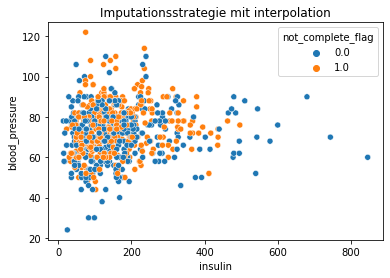

In [83]:
# Visualisierung der Imputationsstrategie mittels KNNImputer
sns.scatterplot(data=diabetes_df_knn, x = "insulin", y = "blood_pressure", hue = "not_complete_flag")
plt.title("Imputationsstrategie mit interpolation")
plt.show()

### 6.4 Verschiedene df.fillna() Methoden

In [84]:
# Erstellen eines DataFrames
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,4.0


In [85]:
# Alle NaN werte mit 0 auffuellen
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0.0
1,3.0,4.0,0.0,1.0
2,0.0,0.0,0.0,0.0
3,0.0,3.0,0.0,4.0


In [86]:
# Den Forward Fill nutzen
df.fillna(method = "ffill")

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,3.0,4.0,NaN,1.0
3,3.0,3.0,NaN,4.0


## 7 DataFrame reshapen und joins

#### Stichwort: pd.pivot_table(), pd.melt(), pd.crosstab()

In [87]:
# DataFrame ausgeben
cars_data_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base',...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,speed
27,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,13495.0,Slow
28,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,16500.0,Slow
29,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,mpfi,2.68,3.47,9.00,154.0,5000,19.0,26.0,16500.0,Medium
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,mpfi,3.19,3.40,10.00,102.0,5500,24.0,30.0,13950.0,Slow
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,mpfi,3.19,3.40,8.00,115.0,5500,18.0,22.0,17450.0,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,9.50,114.0,5400,23.0,28.0,16845.0,Slow
228,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,8.70,160.0,5300,19.0,25.0,19045.0,Medium
229,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.58,2.87,8.80,134.0,5500,18.0,23.0,21485.0,Medium
230,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,idi,3.01,3.40,23.00,106.0,4800,26.0,27.0,22470.0,Slow


### 7.1 df reshapen mit pd.pivot_table() (long to wide)

In [88]:
# Daten einlesen
pokemon_df = pd.read_csv("pokemon_data.csv")
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [89]:
# Pokemon DataFrame verkleinern
pokemon_df_small = pokemon_df.sample(frac = 0.1, random_state=42)
pokemon_df_small = pokemon_df_small.drop_duplicates(subset = ["Type 1", "Type 2"])
pokemon_df_small

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
696,635,Hydreigon,Dark,Dragon,92,105,90,125,90,98,5,False
667,606,Beheeyem,Psychic,NaN,75,75,75,125,95,40,5,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
533,479,RotomWash Rotom,Electric,Water,50,65,107,105,107,86,4,False
66,61,Poliwhirl,Water,NaN,65,65,65,50,50,90,1,False
621,560,Scrafty,Dark,Fighting,65,90,115,45,115,58,5,False
346,317,Swalot,Poison,NaN,100,73,83,73,83,55,3,False
490,442,Spiritomb,Ghost,Dark,50,92,108,92,108,35,4,False
760,690,Skrelp,Poison,Water,50,60,60,60,60,30,6,False
456,411,Bastiodon,Rock,Steel,60,52,168,47,138,30,4,False


In [90]:
# Pivotierung mit pd.pivot
pd.pivot(pokemon_df_small, index = "Type 1", columns = "Type 2", values= "Name")

Type 2,NaN,Dark,Dragon,Fairy,Fighting,Flying,Ghost,Grass,Ground,Ice,Poison,Psychic,Steel,Water
Type 1,,,,,,,,,,,,,,
Bug,Kricketot,NaN,NaN,NaN,Heracross,NaN,NaN,NaN,NaN,NaN,Whirlipede,NaN,NaN,NaN
Dark,Purrloin,NaN,Hydreigon,NaN,Scrafty,NaN,SableyeMega Sableye,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dragon,NaN,NaN,NaN,NaN,NaN,Altaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electric,Pikachu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RotomFrost Rotom,NaN,NaN,NaN,RotomWash Rotom
Fighting,Conkeldurr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MedichamMega Medicham,NaN,NaN
Fire,Growlithe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delphox,NaN,NaN
Ghost,Dusknoir,Spiritomb,GiratinaOrigin Forme,NaN,NaN,NaN,NaN,GourgeistSuper Size,NaN,NaN,NaN,NaN,NaN,NaN
Grass,Pansage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gloom,NaN,Ferroseed,NaN
Ground,Phanpy,NaN,Vibrava,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Aehnelt einem Groupby
pd.pivot_table(data = pokemon_df, index = "Type 1", columns = "Legendary", aggfunc = "mean", values = "HP")

Legendary,False,True
Type 1,,
Bug,56.884058,NaN
Dark,64.655172,98.000000
Dragon,72.650000,101.083333
Electric,57.325000,84.500000
Fairy,70.875000,126.000000
Fighting,69.851852,NaN
Fire,67.085106,96.400000
Flying,62.500000,79.000000
Ghost,58.733333,150.000000


### 7.2 df reshapen mit pd.melt() (wide to long)

#### Stichwort: pd.melt(dataframe, id_vars = , value_vars = , var_names = , value_names = )

In [92]:
# Dataframe erstellen
data = {'Name': ["Ben","Julia","Gabu"], '08/08/21': [10,20,30], '10/08/21': [40,140,32], '12/08/21': [54,23,64]}
df = pd.DataFrame(data)
df

,Name,08/08/21,10/08/21,12/08/21
0,Ben,10,40,54
1,Julia,20,140,23
2,Gabu,30,32,64


In [93]:
pd.melt(frame = df, id_vars = "Name", value_vars = ["08/08/21", "12/08/21"], var_name= "Datum", value_name="Betrag")

,Name,Datum,Betrag
0,Ben,08/08/21,10
1,Julia,08/08/21,20
2,Gabu,08/08/21,30
3,Ben,12/08/21,54
4,Julia,12/08/21,23
5,Gabu,12/08/21,64


### 7.3 Cross Table

In [94]:
# Daten einlesen
titanic_df = pd.read_csv("titanic.csv")
titanic_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [95]:
# Nach Spalten normalisiert
pd.crosstab(titanic_df["Pclass"], titanic_df["Embarked"], normalize = "columns", margins = True) 

Embarked,C,Q,S,All
Pclass,,,,
1,0.549020,0.021739,0.185185,0.255981
2,0.107843,0.086957,0.288889,0.222488
3,0.343137,0.891304,0.525926,0.521531


In [96]:
# Nach Zeilen normalisiert
pd.crosstab(titanic_df["Pclass"], titanic_df["Embarked"], margins = True, normalize = "index") 

Embarked,C,Q,S
Pclass,,,
1,0.523364,0.009346,0.467290
2,0.118280,0.043011,0.838710
3,0.160550,0.188073,0.651376
All,0.244019,0.110048,0.645933


In [97]:
# Kreuztabelle
pd.crosstab(titanic_df["Pclass"], titanic_df["Embarked"], margins = True) 

Embarked,C,Q,S,All
Pclass,,,,
1,56,1,50,107
2,11,4,78,93
3,35,41,142,218
All,102,46,270,418


### 7.4 dfs joinen

#### Stichwort: pd.concat([df1, df2], axis = 1), pd.merge(df1, df2, how = "left", by = )

In [98]:
# Aus zwei gegebenen Dateframe eines erstellen
tips_df_1 = tips_df.sample(frac=0.5)
tips_df_2 = tips_df.sample(frac=0.2)

In [99]:
# DataFarme Horizontale stacken
pd.concat([tips_df_1, tips_df_2], axis = 0)

,total_bill,tip,smoker,day,time,size
112,38.07,4.00,No,Sun,Dinner,3
232,11.61,3.39,No,Sat,Dinner,2
226,10.09,2.00,Yes,Fri,Lunch,2
74,14.73,2.20,No,Sat,Dinner,2
84,15.98,2.03,No,Thur,Lunch,2
...,...,...,...,...,...,...
155,29.85,5.14,No,Sun,Dinner,5
50,12.54,2.50,No,Sun,Dinner,2
193,15.48,2.02,Yes,Thur,Lunch,2
33,20.69,2.45,No,Sat,Dinner,4


## 8 Basic Visualiserungen mit Pandas

#### Stichwort: Lineplot, scatterplot, barplot, boxplot

In [105]:
sterblichkeit_df["Alter"] = sterblichkeit_df["Alter"].str.strip()

### 8.1 Lineplot/ Boxplot / Scatterplots / Barplots

<AxesSubplot:xlabel='endend'>

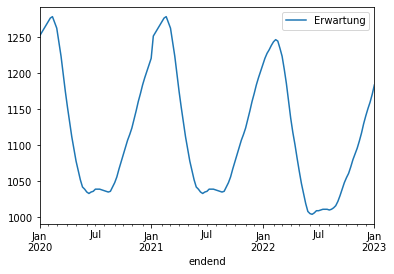

In [106]:
# Lineplot
sterblichkeit_df[sterblichkeit_df["Alter"] == '65+'].plot(kind = "line", x = "endend", y = "Erwartung")

<AxesSubplot:>

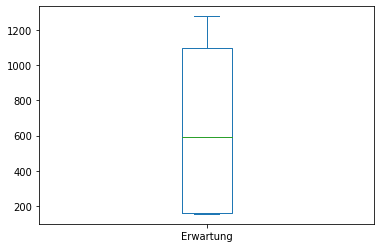

In [107]:
# Boxplot 
sterblichkeit_df["Erwartung"].plot(kind = "box")

<AxesSubplot:ylabel='Frequency'>

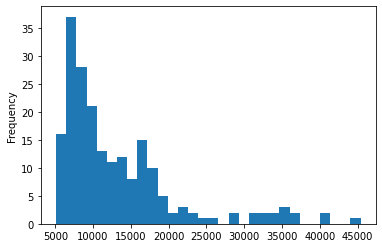

In [108]:
# Histogramm
cars_data_df["price"].plot(kind = "hist", bins = 30)

<AxesSubplot:ylabel='Density'>

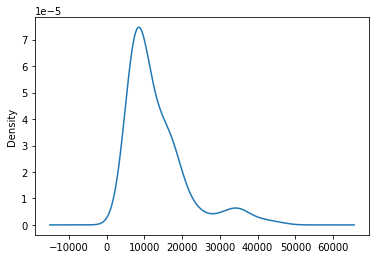

In [109]:
# Density Plot
cars_data_df.price.plot(kind = "kde")

### 8.2 Geglaettete Plots (Moving Average)

#### Stichwort: df['col'].rolling(window = ..., center = True).mean().plot(...)

In [110]:
# Daten einlesen
kurs_df = pd.read_csv("applekurs.csv", index_col="Date")
kurs_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.511703
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.208038
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.441132
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.529114
2022-01-07,174.139999,171.029999,172.889999,172.169998,86709100.0,171.698654
...,...,...,...,...,...,...
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,139.229996
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.720001


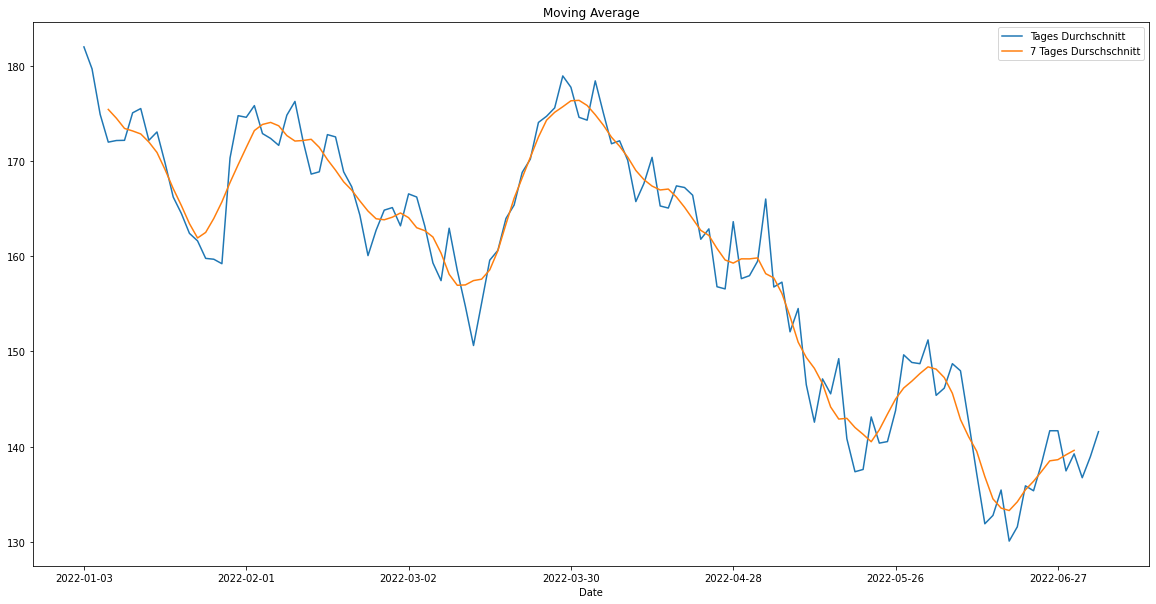

In [111]:
# 7 Tages Durschschnitt von Apples Close berechnen
plt.figure(figsize=(20,10))
kurs_df["Close"].plot(kind = "line", label = "Tages Durchschnitt")
kurs_df["Close"].rolling(window = 7, center = True).mean().plot(kind = "line", label = "7 Tages Durschschnitt")
plt.legend()
plt.title("Moving Average")
plt.show()

### 8.3 Seaborn Plots Korrelationsplot

#### Stichwort: Korrelation Seaborn, sns.corr(df)

In [112]:
# KorrelationsMatrix DataFrame erstellen
diabetes_df.corr()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
n_pregnant,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
gtt,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
blood_pressure,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
triceps_skin_fold_thickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
dpf,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
class,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


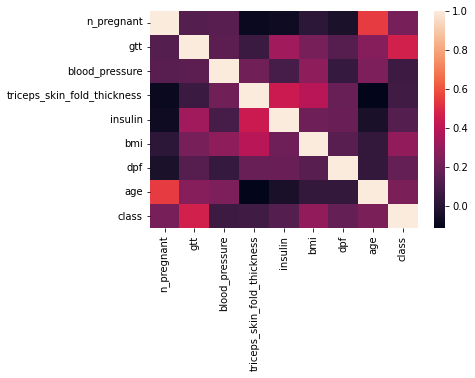

In [113]:
# Visuelle Darstellung mittels Heatmap
sns.heatmap(diabetes_df.corr())
plt.show()

# 9 Aggregationen

### 9.1 Absolut und Relativer Anteil an Werten in einer Spalte ermitteln

In [114]:
# Absoluter Anteil an Werten ermitteln
tips_df["smoker"].value_counts(dropna = False)

No     151
Yes     93
Name: smoker, dtype: int64

In [115]:
# Relativer Anteil an Werten ermitteln
tips_df["smoker"].value_counts(normalize = True, dropna = False)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

<AxesSubplot:>

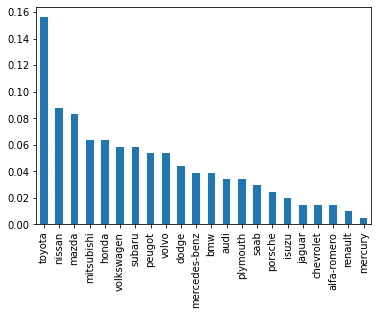

In [116]:
# Visuelle Darstellung
cars_data_df["make"].value_counts(normalize = True, dropna = False).plot(kind = "bar")

### 9.2 Gruppieren und aggregieren mit groupby und alternative mit pivot_table()

In [117]:
# Ausgabe vom DataFrame
cars_data_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base',...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,speed
27,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,13495.0,Slow
28,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,16500.0,Slow
29,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,mpfi,2.68,3.47,9.00,154.0,5000,19.0,26.0,16500.0,Medium
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,mpfi,3.19,3.40,10.00,102.0,5500,24.0,30.0,13950.0,Slow
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,mpfi,3.19,3.40,8.00,115.0,5500,18.0,22.0,17450.0,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,9.50,114.0,5400,23.0,28.0,16845.0,Slow
228,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,8.70,160.0,5300,19.0,25.0,19045.0,Medium
229,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.58,2.87,8.80,134.0,5500,18.0,23.0,21485.0,Medium
230,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,idi,3.01,3.40,23.00,106.0,4800,26.0,27.0,22470.0,Slow


In [118]:
# Bsp Frage: Durchschnittlicher Preis von jeder Automarke ermitteln sortiert absteigend
cars_data_df.groupby("make")["price"].agg("mean").sort_values(ascending = False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='make'>

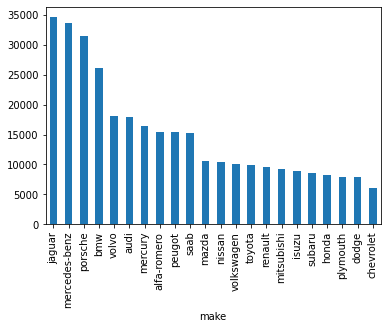

In [119]:
# Visuelle Darstellung der obigen Fragen
cars_data_df.groupby("make")["price"].agg("mean").sort_values(ascending = False).plot(kind = "bar")

In [120]:
cars_data_df.dtypes

symboling              object
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base'            object
length                 object
width                  object
height                 object
curb-weight            object
engine-type            object
num-of-cylinders     category
engine-size            object
fuel-system            object
bore                   object
stroke                 object
compression-ratio      object
horsepower            float64
peak-rpm               object
city-mpg              float64
highway-mpg           float64
price                 float64
speed                category
dtype: object

In [121]:
# Mehrfache Gruppierung und Aggregationen
# Die durchschnittliche Geschwindigkeit sowie Preis aufgrund Marke und Anzahl Zlinder ermitteln
cars_data_df.groupby(["make", "num-of-cylinders"])[["price", "horsepower"]].agg(["mean", "max"])

price           horsepower       
                                      mean      max        mean    max
make        num-of-cylinders                                          
alfa-romero two                        NaN      NaN         NaN    NaN
            three                      NaN      NaN         NaN    NaN
            four              14997.500000  16500.0  111.000000  111.0
            five                       NaN      NaN         NaN    NaN
            six               16500.000000  16500.0  154.000000  154.0
...                                    ...      ...         ...    ...
volvo       four              17193.333333  22625.0  129.777778  162.0
            five                       NaN      NaN         NaN    NaN
            six               21977.500000  22470.0  120.000000  134.0
            eight                      NaN      NaN         NaN    NaN
            twelve                     NaN      NaN         NaN    NaN

[154 rows x 4 columns]

In [122]:
# Alternative zu groupby ist pd.pivot_table()
sterblichkeit_df

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze,Jahr2,Monat,Tag
0,2020,1,2020-01-05,0-64,149,173,139,207,2020,1,5
1,2020,2,2020-01-12,0-64,166,172,138,206,2020,1,12
2,2020,3,2020-01-19,0-64,186,172,138,206,2020,1,19
3,2020,4,2020-01-26,0-64,177,172,138,205,2020,1,26
4,2020,5,2020-02-02,0-64,163,171,137,205,2020,2,2
...,...,...,...,...,...,...,...,...,...,...,...
309,2022,48,2022-12-04,65+,.,1141,1054,1228,2022,12,4
310,2022,49,2022-12-11,65+,.,1151,1065,1239,2022,12,11
311,2022,50,2022-12-18,65+,.,1160,1073,1249,2022,12,18
312,2022,51,2022-12-25,65+,.,1171,1083,1260,2022,12,25


In [123]:
pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [124]:
# Zaehlen wie oft was vorkommt mittels Groupby
pokemon_df.groupby(["Type 1", "Type 2"])[["Generation", "Legendary"]].count()

Generation  Legendary
Type 1 Type 2                         
Bug    Electric           2          2
       Fighting           2          2
       Fire               2          2
       Flying            14         14
       Ghost              1          1
...                     ...        ...
Water  Ice                3          3
       Poison             3          3
       Psychic            5          5
       Rock               4          4
       Steel              1          1

[136 rows x 2 columns]

In [125]:
pd.pivot_table(data = sterblichkeit_df, index=["Jahr", "Alter"], columns = "Woche", values = "Erwartung", aggfunc="first")

Woche           1       2       3       4       5       6       7       8   \
Jahr Alter                                                                   
2020 0-64    173.0   172.0   172.0   172.0   171.0   171.0   170.0   170.0   
     65+    1252.0  1257.0  1262.0  1267.0  1272.0  1277.0  1279.0  1271.0   
2021 0-64    173.0   172.0   172.0   172.0   171.0   171.0   170.0   170.0   
     65+    1252.0  1257.0  1262.0  1267.0  1272.0  1277.0  1279.0  1271.0   
2022 0-64    179.0   179.0   179.0   179.0   179.0   179.0   179.0   178.0   
     65+    1221.0  1228.0  1233.0  1239.0  1244.0  1247.0  1245.0  1235.0   

Woche           9       10  ...      44      45      46      47      48  \
Jahr Alter                  ...                                           
2020 0-64    170.0   169.0  ...   158.0   159.0   159.0   159.0   160.0   
     65+    1263.0  1243.0  ...  1124.0  1136.0  1148.0  1161.0  1172.0   
2021 0-64    170.0   169.0  ...   158.0   159.0   159.0   159.0   160.0   
     65+    1263.0  1243.0  ...  1124.0  1136.0  1148.0  1161.0  1172.0   
2022 0-64    178.0   177.0  ...   168.0   168.0   169.0   170.0   171.0   
     65+    1224.0  1206.0  ...  1096.0  1106.0  1117.0  1130.0  1141.0   

Woche           49      50      51      52      53  
Jahr Alter                                          
2020 0-64    160.0   161.0   161.0   162.0   162.0  
     65+    1184.0  1194.0  1203.0  1212.0  1221.0  
2021 0-64    160.0   161.0   161.0   162.0     NaN  
     65+    1184.0  1194.0  1203.0  1212.0     NaN  
2022 0-64    171.0   172.0   173.0   174.0     NaN  
     65+    1151.0  1160.0  1171.0  1184.0     NaN  

[6 rows x 53 columns]

# Nice to know stuff

### Neue Spalte mit apply und lambda erstellen

In [126]:
cars_data_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base',...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,speed
27,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,13495.0,Slow
28,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,mpfi,3.47,2.68,9.00,111.0,5000,21.0,27.0,16500.0,Slow
29,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,mpfi,2.68,3.47,9.00,154.0,5000,19.0,26.0,16500.0,Medium
30,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,mpfi,3.19,3.40,10.00,102.0,5500,24.0,30.0,13950.0,Slow
31,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,mpfi,3.19,3.40,8.00,115.0,5500,18.0,22.0,17450.0,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,9.50,114.0,5400,23.0,28.0,16845.0,Slow
228,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,mpfi,3.78,3.15,8.70,160.0,5300,19.0,25.0,19045.0,Medium
229,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,mpfi,3.58,2.87,8.80,134.0,5500,18.0,23.0,21485.0,Medium
230,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,idi,3.01,3.40,23.00,106.0,4800,26.0,27.0,22470.0,Slow


In [127]:
# Verbrauch mpg (mile per gallon) umwandeln in liter / 100 km und als neue Spalte hinzufuegen
cars_data_df["verbrauch_l/100km"] = cars_data_df["highway-mpg"].apply(lambda x: 235 / x)
cars_data_df[["highway-mpg", "verbrauch_l/100km"]]

,highway-mpg,verbrauch_l/100km
27,27.0,8.703704
28,27.0,8.703704
29,26.0,9.038462
30,30.0,7.833333
31,22.0,10.681818
...,...,...
227,28.0,8.392857
228,25.0,9.400000
229,23.0,10.217391
230,27.0,8.703704


In [128]:
# Daten einlesen
pokemon_df = pd.read_csv("pokemon_data.csv")
pokemon_df.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [129]:
# apply lambda mit if else Bedingung
pokemon_df["oldschool"] = pokemon_df["Generation"].apply(lambda x : True if x < 3 else False)
pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,oldschool
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,False
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,False
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,False


### Neue Spalte mittels Mathematische Operatoren erstellen

In [130]:
tips_df["Gesamtbetrag"] = tips_df["total_bill"] + tips_df["tip"]
tips_df

,total_bill,tip,smoker,day,time,size,Gesamtbetrag
0,16.99,1.01,No,Sun,Dinner,2,18.00
1,10.34,1.66,No,Sun,Dinner,3,12.00
2,21.01,3.50,No,Sun,Dinner,3,24.51
3,23.68,3.31,No,Sun,Dinner,2,26.99
4,24.59,3.61,No,Sun,Dinner,4,28.20
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,34.95
240,27.18,2.00,Yes,Sat,Dinner,2,29.18
241,22.67,2.00,Yes,Sat,Dinner,2,24.67
242,17.82,1.75,No,Sat,Dinner,2,19.57


### Umwandeln mittels pd.to_numeric()

In [134]:
sterblichkeit_df = pd.read_excel("Sterblichkeit.xlsx", sheet_name=1)
sterblichkeit_df

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze
0,2020,1,05.01.2020,0-64,149,173,139,207
1,2020,2,12.01.2020,0-64,166,172,138,206
2,2020,3,19.01.2020,0-64,186,172,138,206
3,2020,4,26.01.2020,0-64,177,172,138,205
4,2020,5,02.02.2020,0-64,163,171,137,205
...,...,...,...,...,...,...,...,...
309,2022,48,04.12.2022,65+,.,1141,1054,1228
310,2022,49,11.12.2022,65+,.,1151,1065,1239
311,2022,50,18.12.2022,65+,.,1160,1073,1249
312,2022,51,25.12.2022,65+,.,1171,1083,1260


In [137]:
sterblichkeit_df["AnzTF_HR"] = pd.to_numeric(sterblichkeit_df["AnzTF_HR"], errors="coerce")

In [138]:
sterblichkeit_df

,Jahr,Woche,endend,Alter,AnzTF_HR,Erwartung,untGrenze,obeGrenze
0,2020,1,05.01.2020,0-64,149.0,173,139,207
1,2020,2,12.01.2020,0-64,166.0,172,138,206
2,2020,3,19.01.2020,0-64,186.0,172,138,206
3,2020,4,26.01.2020,0-64,177.0,172,138,205
4,2020,5,02.02.2020,0-64,163.0,171,137,205
...,...,...,...,...,...,...,...,...
309,2022,48,04.12.2022,65+,NaN,1141,1054,1228
310,2022,49,11.12.2022,65+,NaN,1151,1065,1239
311,2022,50,18.12.2022,65+,NaN,1160,1073,1249
312,2022,51,25.12.2022,65+,NaN,1171,1083,1260
